In [1]:
import torch
import numpy as np
import gpytorch
from gpytorch.kernels import RBFKernel
from ntwrk.bayesopt import BayesOpt
import matplotlib.pyplot as plt

In [2]:
def true_func(xx):
    return torch.sin(xx * 4) + torch.sin(xx * 8)

In [3]:
xx = torch.linspace(0, 1)

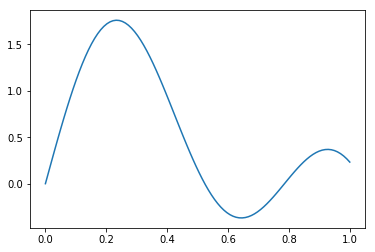

In [4]:
plt.plot(xx, true_func(xx).detach())
plt.show()

In [5]:
x = torch.rand(5)
y = true_func(x)

In [6]:
bo = BayesOpt(x, y, max_x=1.)

In [7]:
bo.train_surrogate(iters=200)

In [8]:
bo.surrogate_lh.eval();
bo.surrogate.eval();

test_points = torch.linspace(0, 1., 1000).float()
test_dist = bo.surrogate_lh(bo.surrogate(test_points))

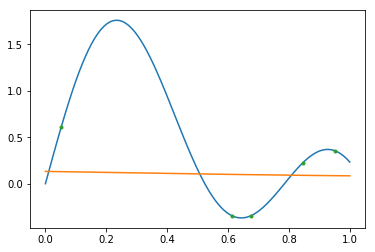

In [9]:
plt.plot(xx, true_func(xx).detach())
plt.plot(test_points, test_dist.mean.detach())
plt.plot(x, y.detach(), marker='.', linestyle="None")
plt.show()


In [10]:
bo.acquire()

tensor(0.)

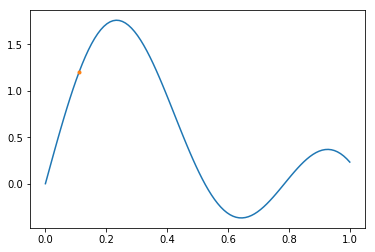

tensor([0.9299])


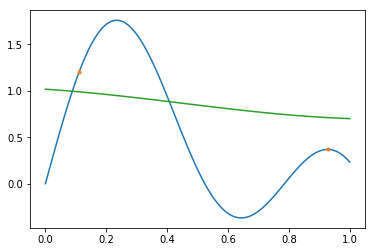

tensor([0.0711])


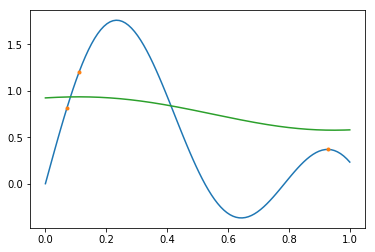

tensor([0.1582])


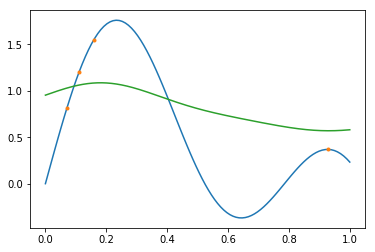

tensor([0.1802])


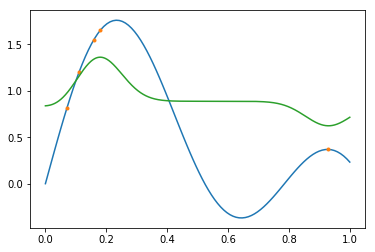

tensor([0.1932])


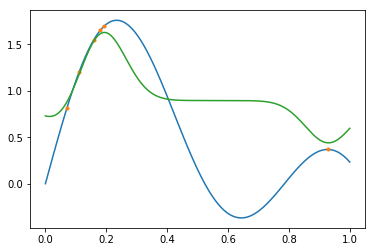

tensor([0.2162])


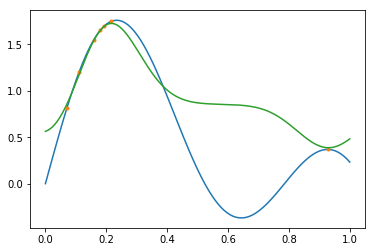

tensor([0.2272])


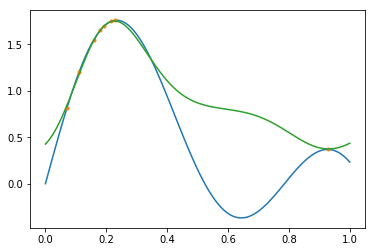

tensor([0.2292])


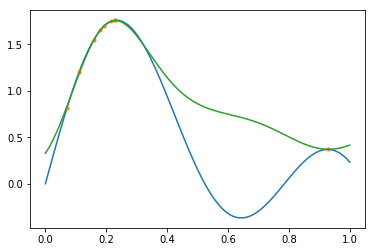

tensor([0.2312])


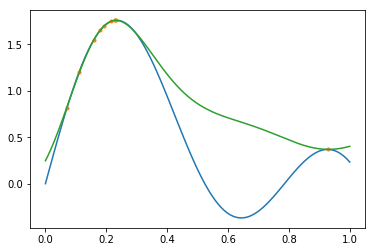

tensor([0.2332])


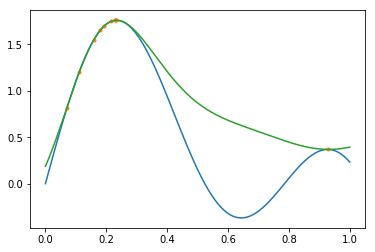

In [11]:
rate = torch.rand(1)
rwrd = true_func(rate)
bo = BayesOpt(rate, rwrd, max_x=1.)

plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()

rnds = 10

for ii in range(rnds):
    bo.train_surrogate(iters=100)
    next_rate = bo.acquire(explore=0.).unsqueeze(0)
    rwrd = true_func(next_rate)
    print(next_rate)
    bo.update_obs(next_rate, rwrd)
    
    bo.surrogate_lh.eval();
    bo.surrogate.eval();

    test_points = torch.linspace(0, 1., 1000).float()
    test_dist = bo.surrogate_lh(bo.surrogate(test_points))
    
    plt.plot(xx, true_func(xx).detach())
    plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
    plt.plot(test_points, test_dist.mean.detach())
    plt.show()

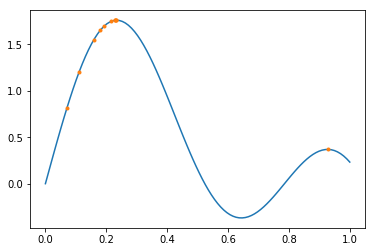

In [12]:
plt.plot(xx, true_func(xx).detach())
plt.plot(bo.train_x, bo.train_y, marker='.', linestyle="None")
plt.show()